<a href="https://colab.research.google.com/github/HriddhiDoley/predicting_olympic_medal/blob/main/predict_olympic_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Olympic Medals Prediction Project

## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load Dataset
data = pd.read_csv('gni-olympics.csv')
data.head()

,iso,ioc,name,continent,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,gold,silver,bronze
0,ARG,ARG,Argentina,South America,45376763,383066977654,19.597142,9.324537,19.597142,9.324537,3,0,1,2
1,ARM,ARM,Armenia,Asia,2963234,12645459214,19.681457,13.497324,19.681457,13.497324,4,0,2,2
2,AUS,AUS,Australia,Oceania,25687041,1330900925057,31.170099,11.073845,31.170099,11.073845,46,17,7,22
3,AUT,AUT,Austria,Europe,8917205,428965397959,12.212139,15.923033,12.212139,15.923033,7,1,1,5
4,AZE,AZE,Azerbaijan,Europe,10110116,42607176471,18.213838,13.103344,18.213838,13.103344,7,0,3,4


In [5]:
# prompt: Using dataframe data: write codes to generate all the above 19 charts

# Import necessary libraries
import altair as alt
import pandas as pd

# Assuming 'data' is your pandas DataFrame

# 1. Population vs. GDP scatter plot
alt.Chart(data).mark_circle().encode(
    x='population',
    y='gdp',
    tooltip=['name', 'population', 'gdp']
).interactive()


# 2. Olympics Index vs. Sports Index scatter plot
alt.Chart(data).mark_circle().encode(
    x='olympics_index',
    y='sports_index',
    tooltip=['name', 'olympics_index', 'sports_index']
).interactive()


# 3. GDP distribution histogram
alt.Chart(data).mark_bar().encode(
    alt.X("gdp", bin=True),
    y='count()',
).interactive()

#4. Population distribution histogram
alt.Chart(data).mark_bar().encode(
    alt.X("population", bin=True),
    y='count()',
).interactive()

# 5. Olympics Index distribution histogram
alt.Chart(data).mark_bar().encode(
    alt.X('olympics_index', bin=True),
    y='count()',
).interactive()

#6. Sports index distribution histogram
alt.Chart(data).mark_bar().encode(
    alt.X("sports_index", bin=True),
    y='count()',
).interactive()

# 7. Total medals vs. Gold medals scatter plot
alt.Chart(data).mark_circle().encode(
    x='total',
    y='gold',
    tooltip=['name', 'total', 'gold']
).interactive()

# 8. Total medals vs. Silver medals scatter plot
alt.Chart(data).mark_circle().encode(
    x='total',
    y='silver',
    tooltip=['name', 'total', 'silver']
).interactive()

# 9. Total medals vs. Bronze medals scatter plot
alt.Chart(data).mark_circle().encode(
    x='total',
    y='bronze',
    tooltip=['name', 'total', 'bronze']
).interactive()


# 10. Bar chart of total medals by continent
alt.Chart(data).mark_bar().encode(
    x='continent',
    y='sum(total)'
).interactive()


# 11. Bar chart of gold medals by continent
alt.Chart(data).mark_bar().encode(
    x='continent',
    y='sum(gold)'
).interactive()


# 12. Bar chart of silver medals by continent
alt.Chart(data).mark_bar().encode(
    x='continent',
    y='sum(silver)'
).interactive()


# 13. Bar chart of bronze medals by continent
alt.Chart(data).mark_bar().encode(
    x='continent',
    y='sum(bronze)'
).interactive()


# 14. Scatter plot: population vs. olympicsIndex colored by continent
alt.Chart(data).mark_circle().encode(
    x='population',
    y='olympicsIndex',
    color='continent',
    tooltip=['name', 'population', 'olympicsIndex', 'continent']
).interactive()


# 15. Scatter plot: gdp vs. sportsIndex colored by continent
alt.Chart(data).mark_circle().encode(
    x='gdp',
    y='sportsIndex',
    color='continent',
    tooltip=['name', 'gdp', 'sportsIndex', 'continent']
).interactive()

#16. Correlation heatmap
# Assuming you have a correlation matrix (e.g., corr_matrix) from pandas:
# corr_matrix = data.corr()
# alt.Chart(corr_matrix.reset_index().melt('index')).mark_rect().encode(
#     x='index:O',
#     y='variable:O',
#     color='value:Q'
# )

# 17-19.  More charts can be created based on your data, e.g.:
#  * Boxplots
#  * Line charts over time (if you have a time column)
#  * Maps (if you have geographic information)

alt.Chart(...)

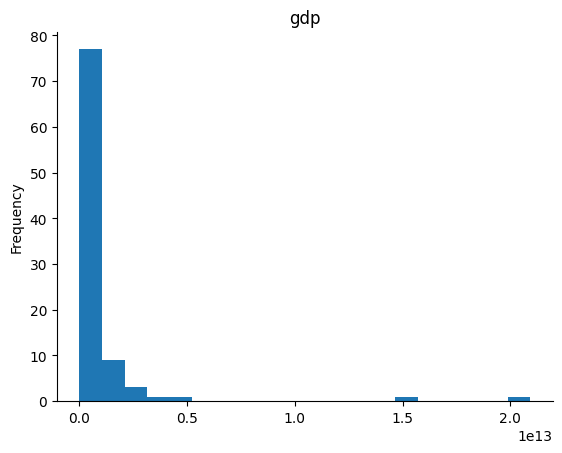

In [4]:
# @title gdp

from matplotlib import pyplot as plt
data['gdp'].plot(kind='hist', bins=20, title='gdp')
plt.gca().spines[['top', 'right',]].set_visible(False)

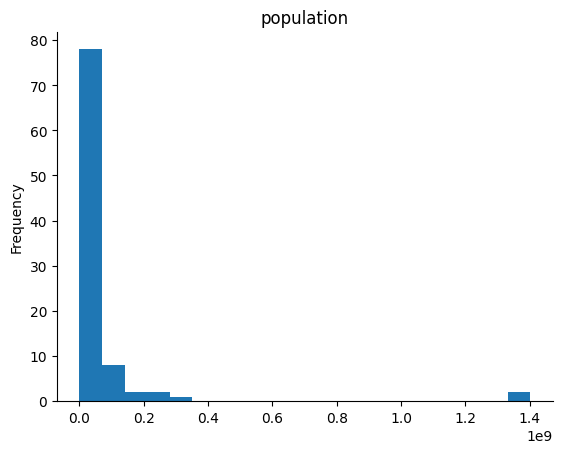

In [3]:
# @title population

from matplotlib import pyplot as plt
data['population'].plot(kind='hist', bins=20, title='population')
plt.gca().spines[['top', 'right',]].set_visible(False)

Step 1: Understading the data. In this step, I am going through each feature and trying to understand the pattern of the data, see if there are any outliers, missing values etc.

Step 2: Feature Engineering

In [ ]:

## Data Preprocessing

# Check for missing values
data.isnull().sum()

# Handle missing values (example: drop rows with NaN)
data.dropna(inplace=True)

# Check for duplicates
data.duplicated().sum()
data.drop_duplicates(inplace=True)

# Normalize numerical features (GDP and population)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['gdp', 'population']] = scaler.fit_transform(data[['gdp', 'population']])

# Feature Engineering
data['gdp_population_interaction'] = data['gdp'] * data['population']

# Split dataset into features and target
target = 'total'
X = data[['gdp', 'population', 'sports_index', 'gdp_population_interaction']]
y = data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploratory Data Analysis

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot
plt.scatter(data['gdp'], data['total'])
plt.xlabel('GDP')
plt.ylabel('Total Medals')
plt.title('GDP vs Total Medals')
plt.show()

## Machine Learning Models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Evaluate Models
results = {
    'Linear Regression': evaluate_model(y_test, y_pred_lr),
    'Decision Tree': evaluate_model(y_test, y_pred_dt),
    'Random Forest': evaluate_model(y_test, y_pred_rf),
}

results_df = pd.DataFrame(results, index=['MAE', 'MSE', 'R2']).T
print(results_df)

## Deep Learning Model

# Build Neural Network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
y_pred_nn = model.predict(X_test)

# Add Neural Network to Results
nn_results = evaluate_model(y_test, y_pred_nn.flatten())
results_df.loc['Neural Network'] = nn_results
print(results_df)

# Plot Training History
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Neural Network Training History')
plt.show()
